# House price prediction
## Просмотр данных

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
train = pd.read_csv('./data/train.csv', index_col='Id')
test = pd.read_csv('./data/train.csv', index_col='Id')
train.columns.values # Список столбцов

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

In [28]:
train['MSZoning'].value_counts()

RL         1113
RM          214
FV           62
RH           15
C (all)      10
Name: MSZoning, dtype: int64

## Первичная обработка данных
### Работа с пропущенными значениями
В данных есть 19 атрибутов имеющих пропущенные значения, из них 5 имеющих более 50% всех данных. В большинстве случаев NA означает отсутствие предмета, описываемого атрибутом, например, отсутствие бассейна, забора, отсутствия гаража и подвала.

<AxesSubplot: >

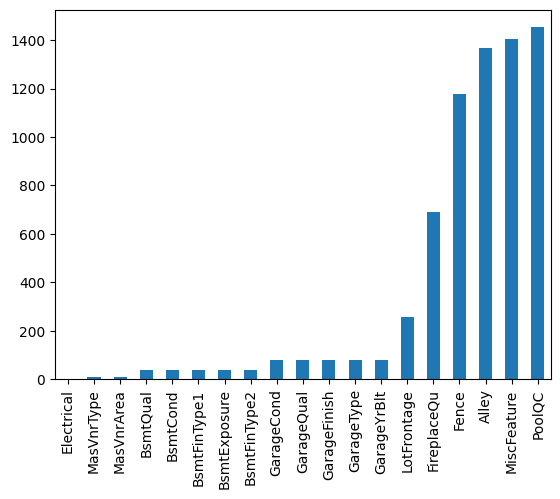

In [4]:
missing = train.isnull().sum() # 
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [17]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [18]:
train.drop(['Alley', 'PoolQC','Fence','MiscFeature'],axis=1,inplace=True) # Убираем толбцы с боллее 90% пропусками 
train.drop(['GarageYrBlt'],axis=1,inplace=True) # Убирам столбец с годом постройки гаража

In [19]:
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])

In [20]:
train['FireplaceQu'] = train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])

In [21]:
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])

In [24]:
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [25]:
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])

In [26]:
train.dropna(inplace=True)

In [27]:
train.shape

(1414, 75)

Living area and SalePrice

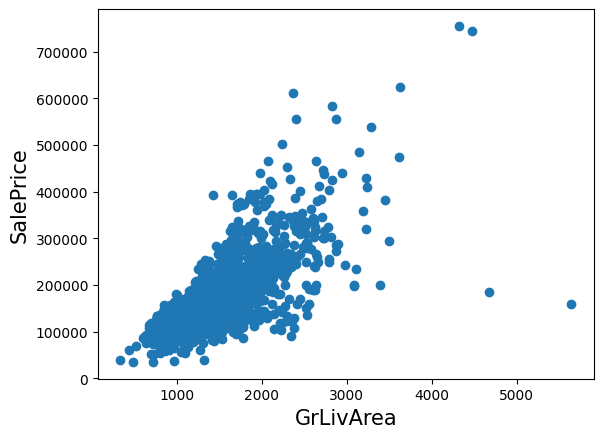

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [7]:
train_X = train.drop(['SalePrice'], axis=1)
train_y = train.SalePrice
test_X = test